In [2]:
# Problem 5.3, P.123 of A first course of FEM

In [3]:
from fenics import *
import numpy as np

In [7]:
# Create mesh and define function space
# IntervalMesh(nx, a, b)
# nx (int) The number of cells, a (float) The minimum point (inclusive), b (float) The maximum point (inclusive)./
mesh = IntervalMesh(10, 1, 4)

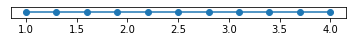

In [8]:
plot(mesh)

In [17]:
V = FunctionSpace(mesh, "P", 1)
f = Expression("10.0/3 * (x[0] + 2.0)", degree=1)

u_L = Constant(100)
u_R = Constant(0)

def boundary_L(x, on_boundary):
    tol = 1E-12
    return on_boundary and near(x[0], 1, tol)

def boundary_R(x, on_boundary):
    tol = 1E-12
    return on_boundary and near(x[0], 4, tol)


bc_L = DirichletBC(V, u_L, boundary_L)
bc_R = DirichletBC(V, u_R, boundary_R)
bcs = [bc_L, bc_R]

In [18]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(v), grad(u))*dx
L = v * f * dx

In [19]:
# Compute solution
u = Function(V)
solve(a == L, u, bcs)

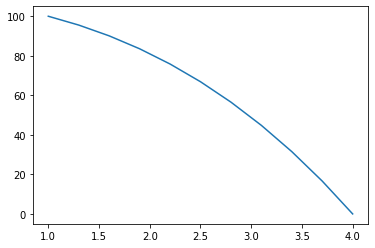

In [20]:
plot(u)

In [7]:
# Compute error in L2 norm
error_L2 = errornorm(u_D, u, "L2")

# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)

error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

# Print errors
print("error_L2 =", error_L2)
print("error_max =", error_max)

error_L2 = 0.3265986342656266
error_max = 6.557456799782813e-10


In [8]:
vertex_values_u_D

array([   0. ,   79.6,  158.4,  236.4,  313.6,  390. ,  465.6,  540.4,
        614.4,  687.6,  760. ,  831.6,  902.4,  972.4, 1041.6, 1110. ,
       1177.6, 1244.4, 1310.4, 1375.6, 1440. , 1503.6, 1566.4, 1628.4,
       1689.6, 1750. , 1809.6, 1868.4, 1926.4, 1983.6, 2040. , 2095.6,
       2150.4, 2204.4, 2257.6, 2310. , 2361.6, 2412.4, 2462.4, 2511.6,
       2560. , 2607.6, 2654.4, 2700.4, 2745.6, 2790. , 2833.6, 2876.4,
       2918.4, 2959.6, 3000. , 3039.6, 3078.4, 3116.4, 3153.6, 3190. ,
       3225.6, 3260.4, 3294.4, 3327.6, 3360. , 3391.6, 3422.4, 3452.4,
       3481.6, 3510. , 3537.6, 3564.4, 3590.4, 3615.6, 3640. , 3663.6,
       3686.4, 3708.4, 3729.6, 3750. , 3769.6, 3788.4, 3806.4, 3823.6,
       3840. , 3855.6, 3870.4, 3884.4, 3897.6, 3910. , 3921.6, 3932.4,
       3942.4, 3951.6, 3960. , 3967.6, 3974.4, 3980.4, 3985.6, 3990. ,
       3993.6, 3996.4, 3998.4, 3999.6, 4000. ])

In [10]:
vertex_values_u - vertex_values_u_D

array([ 0.00000000e+00, -1.41966439e-11, -2.83932877e-11, -4.26609859e-11,
       -5.68434189e-11, -7.09974302e-11, -8.51514415e-11, -9.92486093e-11,
       -1.13232090e-10, -1.27442945e-10, -1.41426426e-10, -1.55637281e-10,
       -1.69507075e-10, -1.83263182e-10, -1.97132977e-10, -2.10548023e-10,
       -2.23963070e-10, -2.37378117e-10, -2.50111043e-10, -2.62616595e-10,
       -2.75122147e-10, -2.88082447e-10, -3.00815373e-10, -3.13320925e-10,
       -3.24689609e-10, -3.36513040e-10, -3.47881723e-10, -3.59250407e-10,
       -3.70391717e-10, -3.80168785e-10, -3.89945853e-10, -3.99722921e-10,
       -4.09727363e-10, -4.18822310e-10, -4.27007762e-10, -4.35193215e-10,
       -4.43378667e-10, -4.52018867e-10, -4.59749572e-10, -4.65661287e-10,
       -4.72482498e-10, -4.78394213e-10, -4.84760676e-10, -4.91581886e-10,
       -4.97493602e-10, -5.03405317e-10, -5.08862286e-10, -5.13864507e-10,
       -5.19776222e-10, -5.24323696e-10, -5.28871169e-10, -5.32963895e-10,
       -5.37966116e-10, -